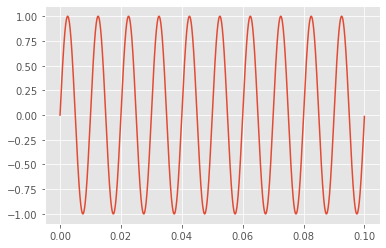

In [1]:
# sampling a sine wave programmatically
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 100 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)

plt.plot(t_vec,y)
plt.show()



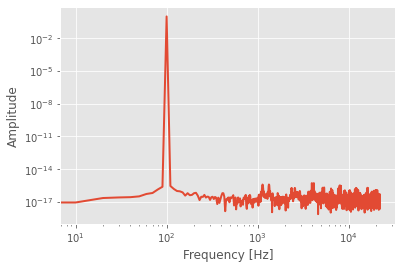

In [4]:
# fourier transform and frequency domain
#
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()